# Auswertung Laufzeit

#### Importe

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import timeit
from pathlib import Path
from scipy.optimize import curve_fit

#### Laden der Laufzeit für klassische Berechnung

In [2]:
calc_time_data_file = Path.cwd().parent / 'data' / 'pred_time.npz'
calc_data = np.load(calc_time_data_file)

calc_time_1 = np.array(calc_data['pred_time_1'])
calc_time_100 = np.array(calc_data['pred_time_100'])
calc_time_500 = np.array(calc_data['pred_time_500'])
calc_time_1000 = np.array(calc_data['pred_time_1000'])
calc_time_5000 = np.array(calc_data['pred_time_5000'])
calc_time_10000 = np.array(calc_data['pred_time_10000'])

calc_time = [calc_time_1, calc_time_100, calc_time_500, calc_time_1000, calc_time_5000, calc_time_10000]

#### Laden der Laufzeit für Vorhersage mit aNN

In [3]:
ann_time_data_file = Path.cwd().parent / 'data' / 'ann_time.npz'
ann_data = np.load(ann_time_data_file)

ann_time_100 = np.array(ann_data['ann_time_100'])
ann_time_1000 = np.array(ann_data['ann_time_1000'])
ann_time_ztsd = np.array(ann_data['ann_time_10000'])
ann_time_zwtsd = np.array(ann_data['ann_time_20000'])
ann_time_htsd = np.array(ann_data['ann_time_htsd'])

ann_time = [ann_time_100, ann_time_1000, ann_time_ztsd, ann_time_zwtsd, ann_time_htsd]

#### Kurve durch Datenpunkte legen - Berechnung

In [4]:
# # objective function
# def objective(x, a, b):
#     y = a * (x**b)
#     return y

# # fit curve
# popt,_ = curve_fit(objective, [1, 100, 1000], calc_time)

# a,b = popt
# x_fit_calc = np.linspace(0, 100000, 1000)
# y_fit_calc = objective(x_fit_calc, a, b)

ValueError: operands could not be broadcast together with shapes (3,) (6,) 

#### Kurve durch Datenpunkte legen - aNN

In [ ]:
# # objective function
# def objective(x, a, b):
#     y = a * (x**b)
#     return y

# # fit curve
# popt,_ = curve_fit(objective, [100, 1000, 10000, 20000, 100000], ann_time)

# a,b = popt
# x_fit_ann = np.linspace(0, 100000, 1000)
# y_fit_ann = objective(x_fit_ann, a, b)

#### Plot Verlauf der Berechnungszeit

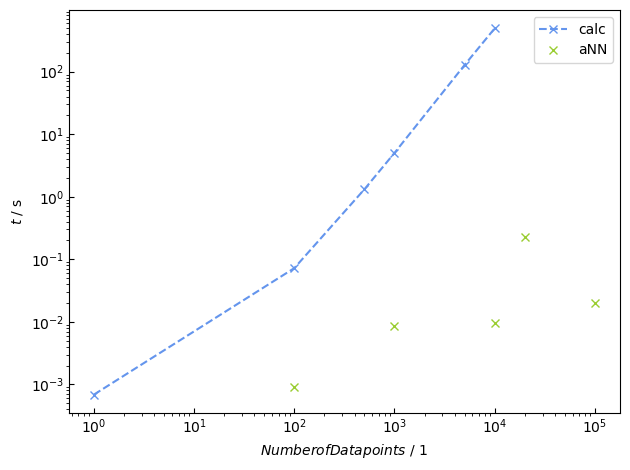

In [5]:
fig,ax = plt.subplots()

ax.loglog([1, 100, 500, 1000, 5000, 10000], calc_time, 'x--', color ='cornflowerblue', label = 'calc')
#ax.loglog(x_fit_calc, y_fit_calc, '-', color = 'rebeccapurple', label = ' calc fit')
ax.loglog([100, 1000, 10000, 20000, 100000], ann_time, 'x', color = 'yellowgreen', label = 'aNN')
#ax.loglog(x_fit_ann, y_fit_ann, '-', color = 'yellowgreen', label = 'ann fit')

# ax.plot([1, 100, 1000], calc_time, 'x', color ='cornflowerblue', label = 'calc')
# ax.plot(x_fit_calc, y_fit_calc, '-', color = 'rebeccapurple', label = 'calc fit')
# ax.plot([100, 1000, 10000, 20000, 100000], ann_time, 'x', color = 'seagreen', label = 'aNN')
#ax.plot(x_fit_ann, y_fit_ann, '-', color = 'yellowgreen', label = 'ann fit')

ax.set(xlabel = '$Number of Datapoints$ / 1', ylabel = '$t$ / s')
ax.tick_params(direction = 'in') #, length = 20, width = 3)
ax.legend()
#ax.legend(['$\\mathregular{R^2}$ = ', r2(xi_real,xi_pred)], markerscale=0)

#plt.legend()
#fig.suptitle("Parity Plot")
plt.tight_layout()
plt.show()

